In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# High Dimensional Space
## Introduction
- High dimensional space is different.
- The distance between all pairs of points will be essentially the same.
- The volume of the unit ball goes to zero.
- The volume of a unit ball is concentrated near its surface and its equator.

## The Law of Large Numbers
The square of the distance between two points $y$ and $z$:

$$ |y-z|^2 = \sum^d_{i=1} (y_i - z_i)^2 $$

can be viewed the sum of $d$ independent samples of a random variable $x$.

$$ x_i = (y_i - z_i)^2 $$
Random variable $x$ has bounded variance. So we can use **The Law of Large Numbers**:

$$ Prob(|\frac{x_1 + x_2 + \dots + x_n}{n} - E(x)| \geq \epsilon) \leq \frac{Var(x)}{n\epsilon^2} $$

It means that, with high probability, the sum is close to its expectation.

Then I try to use Python to validate this law.

In [40]:
def get_gaussian_point_constant_throughout(dimensional):
    # set expectation to 0 and variance to 1/2pi
    # thus, mu = 0 and sigma = \sqrt(1/2pi)
    # so that the Gaussian probability density equals 1 at the origin
    # and is bounded below throughtout the unit ball by a constant
    return np.random.normal(0, np.sqrt(1/(2*np.pi)), 
                            dimensional)
print(get_gaussian_point_constant_throughout(4))

[ 0.62796919 -0.00277906  1.41255307  0.23688436]


In [12]:
def distance_origin(point):
    return np.sqrt((point**2).sum())
print(distance_origin(np.array([5, 12, 13])))

18.384776310850235


How many points are in the unit ball?

In [77]:
def test_unitball(dimensional, samples):
    test_points = np.array([get_gaussian_point_constant_throughout(dimensional)
                            for i in range(samples)])
    test_distances_origin = [distance_origin(point) 
                             for point in test_points]
    plt.title("{} Gaussian points' distance in {}-d space, $\mu = 0, \sigma =1 /\ 2\pi$"
              .format(samples, dimensional))
    plt.xlabel("Distance from origin")
    plt.ylabel("Counts")
    plt.hist(test_distances_origin, 50)
    plt.show()

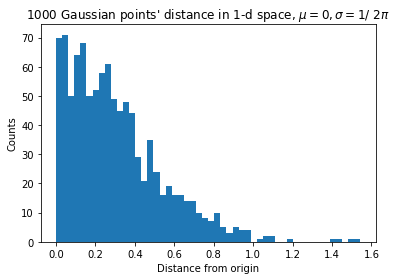

In [78]:
test_unitball(1, 1000)

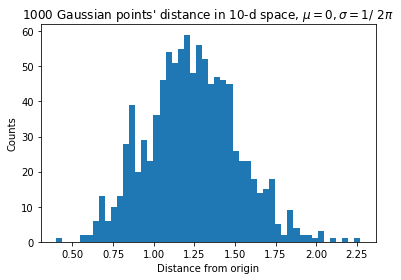

In [79]:
test_unitball(10, 1000)

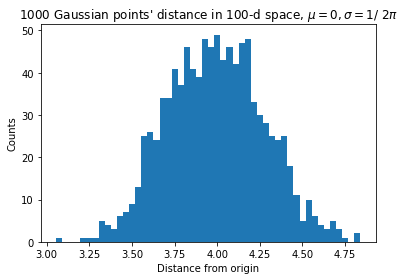

In [80]:
test_unitball(100, 1000)

We can see that, with the increasing of dimensional, there are fewer and fewer points in the unit ball (whose distance < 1). So the volume of unit ball is very small in high dimensional space.

In [42]:
def get_gaussian_point_unit_var(dimensional):
    # set expectation to 0 and variance to 1
    # thus, mu = 0 and sigma = 1
    return np.random.normal(0, 1, dimensional)
print(get_gaussian_point_unit_var(4))

[ 0.52985749  1.74475468 -3.02261382 -0.24185653]


In [43]:
print([distance_origin(get_gaussian_point_unit_var(100)) 
       for i in range(10)])

[11.369480608868622, 11.288482626633831, 9.109153926515464, 10.866010544043247, 10.149714455846613, 9.31371794798683, 10.555076289892984, 10.865577912112784, 9.830335448038296, 9.93775390541916]


In [85]:
def test_unit_var_points_length(dimensional, samples):
    test_points = np.array([get_gaussian_point_unit_var(dimensional) 
                            for i in range(samples)])
    unit_var_distances = [distance_origin(point) 
                          for point in test_points]
    plt.title("{} Gaussian points distance in {}-d space, $\mu = 0, \sigma = 1$"
              .format(samples, dimensional))
    plt.xlabel("Distance from origin")
    plt.ylabel("Counts")
    plt.hist(unit_var_distances, 50)
    plt.show()

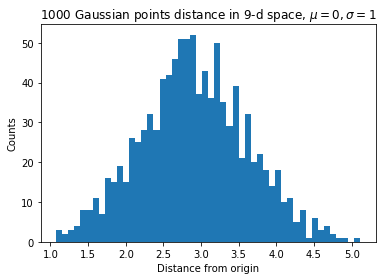

In [88]:
test_unit_var_points_length(9, 1000)

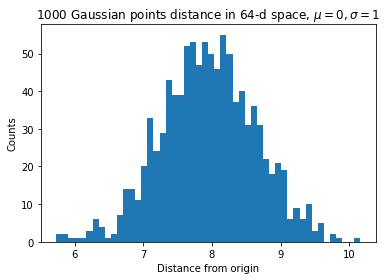

In [89]:
test_unit_var_points_length(64, 1000)

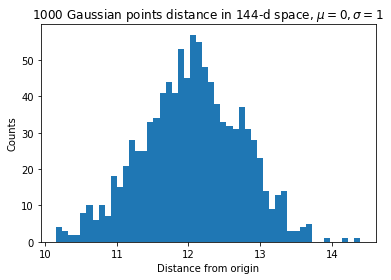

In [90]:
test_unit_var_points_length(144, 1000)

We can see that the most common length in $d$-dimensional space is $\sqrt{d}$.

How about the distance of a pair of Gaussian points?

In [94]:
def distance_pair(point1, point2):
    return distance_origin(point1-point2)

In [95]:
def test_distance_pair(dimensional, samples):
    test_points1 = np.array([get_gaussian_point_unit_var(dimensional) 
                            for i in range(samples)])
    test_points2 = np.array([get_gaussian_point_unit_var(dimensional) 
                            for i in range(samples)])
    pair_distances = [distance_pair(point1, point2) 
                          for point1,point2 in zip(test_points1, test_points2)]
    plt.title("{} pair Gaussian points distance in {}-d space, $\mu = 0, \sigma = 1$"
              .format(samples, dimensional))
    plt.xlabel("Distance pair")
    plt.ylabel("Counts")
    plt.hist(pair_distances, 50)
    plt.show()

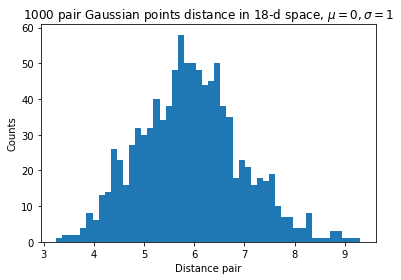

In [97]:
test_distance_pair(18, 1000)

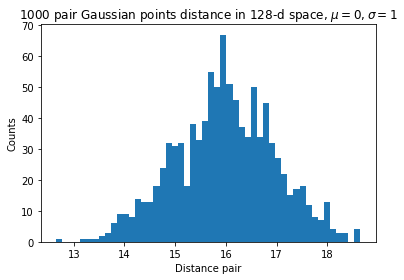

In [98]:
test_distance_pair(128, 1000)

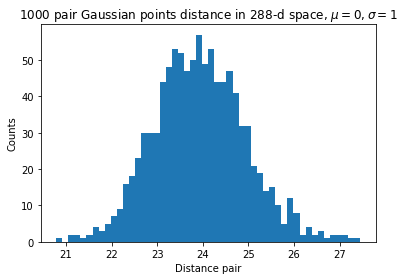

In [99]:
test_distance_pair(288, 1000)

Similarly, in $d$-dimensional space, the distance between Gaussian points is $\sqrt{2d}$.

And we can find that $|y|^2 + |z|^2 = |y-z|^2 = 2d$, therefore, $y$ and $z$ must be approximately orthogonal.

## The Geometry of High Dimensions

1. Most of the high-dimensional objects' volume is near the surface.

**Proof**:

For $A$ in $R^d$, shrink A by a small amount $\epsilon$. Now we get a new object $(1-\epsilon)A = \{(1-\epsilon)x|x \in A\}$. Then:

$$ volume((1-\epsilon) A) = (1-\epsilon)^d volume(A)$$

Using $1-x \leq e^{-x}$,

$$ \frac{volume((1-\epsilon)A)}{volume(A)} = (1-\epsilon)^d \leq e^{-\epsilon d} $$

Fix $\epsilon$. When $d \rightarrow \infty$, the fraction approaches zero. This means the object is "empty" inside.

## Properties of the Unit Ball